### H1-B Visa Wage Prediction.
-----
-----

In [444]:
%pwd

'E:\\ML Project\\Project1'

In [1]:
#import os
#os.chdir('E:\ML Project\Project1')

PermissionError: [WinError 21] The device is not ready: 'E:\\ML Project\\Project1'

In [7]:
import pandas as pd
import numpy as np 
import warnings
import collections
import seaborn as sns
from datetime import datetime
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,LassoCV
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error
warnings.filterwarnings("ignore")
pd.pandas.set_option('display.max_columns', None)

In [11]:
dataset = pd.read_csv('H-1BVisaApplications-2017.csv',na_values=['NA'],index_col=None)
print('Dimension: {}'.format(dataset.shape))
dataset.head()

Dimension: (624650, 52)


,case_number,visa_class,case_status,employer_name,employer_business_dba,employer_address,employer_city,employer_state,employer_postal_code,employer_country,employer_province,employer_phone,employer_phone_ext,naics_code,soc_name,soc_code,job_title,total_workers,case_submitted,decision_date,employment_start_date,employment_end_date,full_time_position,prevailing_wage,pw_unit_of_pay,wage_rate_of_pay_from,wage_rate_of_pay_to,wage_unit_of_pay,worksite_city,worksite_county,worksite_state,worksite_postal_code,agent_attorney_name,agent_representing_employer,agent_attorney_city,agent_attorney_state,h1b_dependent,willful_violator,original_cert_date,new_employment,continued_employment,change_previous_employment,new_concurrent_employment,change_employer,amended_petition,pw_wage_level,pw_source,pw_source_year,pw_source_other,support_h1b,labor_con_agree,public_disclosure_location
0,I-200-17060-115035,H-1B,CERTIFIED,"SIMERICS, INC.",NaN,1750 112TH AVENUE NE,BELLEVUE,WA,98004,UNITED STATES OF AMERICA,NaN,4255029978,NaN,541512,MECHANICAL ENGINEERS,17-2141,PROJECT ENGINEER,1,2017-02-28,2017-03-06,2017-08-30,2020-08-30,Y,76773.0,Year,86000.0,0.0,Year,NOVI,OAKLAND,MI,48375,"DIVATIA, AKSHAT",Y,BELLEVUE,WA,N,N,NaN,1.0,0.0,0.0,0.0,0.0,0.0,Level II,Other,2016.0,OFLC ONLINE DATA CENTER,NaN,NaN,NaN
1,I-200-17060-521850,H-1B,CERTIFIED,"MIZUHO BANK, LTD.",NaN,1251 AVENUE OF THE AMERICAS,NEW YORK,NY,10020,UNITED STATES OF AMERICA,NaN,2122823260,NaN,522110,FINANCIAL ANALYSTS,13-2051,ANALYST,1,2017-02-28,2017-03-06,2017-08-30,2020-08-30,Y,65749.0,Year,90000.0,0.0,Year,NEW YORK,NEW YORK,NY,10020,"ANSTEY, SARAH",Y,NEW YORK,NY,N,N,NaN,1.0,0.0,0.0,0.0,0.0,0.0,Level I,OES,2016.0,OFLC ONLINE DATA CENTER,NaN,NaN,NaN
2,I-200-17060-438863,H-1B,CERTIFIED,TATA CONSULTANCY SERVICES LIMITED,NaN,9201 CORPORATE BOULEVARD,ROCKVILLE,MD,20850,UNITED STATES OF AMERICA,NaN,3012319083,NaN,541511,WEB DEVELOPERS,15-1134,DEVELOPER USER INTERFACE,1,2017-02-28,2017-03-06,2017-08-11,2020-08-10,Y,49275.0,Year,60700.0,87000.0,Year,LINCOLNSHIRE,LAKE,IL,60069,"MUHLENKAMP, PRISCILLA",Y,WASHINGTON,DC,Y,N,NaN,0.0,1.0,0.0,0.0,0.0,0.0,Level II,OES,2016.0,OFLC ONLINE DATA CENTER,Y,NaN,NaN
3,I-200-17060-312033,H-1B,CERTIFIED,"STRATEGIC RESOURCES INTERNATIONAL, INC.",NaN,777 WASHINGTON RD,PARLIN,NJ,08859,UNITED STATES OF AMERICA,NaN,7328874646,NaN,541511,COMPUTER PROGRAMMERS,15-1131,PROGRAMMER ANALYST,1,2017-02-28,2017-03-06,2017-08-30,2020-08-30,Y,55910.0,Year,60000.0,0.0,Year,WEEHAWKEN,HUDSON,NJ,07086,",",N,NaN,NaN,Y,N,NaN,1.0,0.0,0.0,0.0,0.0,0.0,Level I,Other,2016.0,OFLC ONLINE DATA CENTER,Y,Y,NaN
4,I-200-17060-336602,H-1B,CERTIFIED,"EAPT SOLUTIONS, INC.",NaN,5 VAUGHN STREET,PRINCETON,NJ,08540,UNITED STATES OF AMERICA,NaN,7329810630,104,541511,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,JAVA DEVELOPER,1,2017-02-28,2017-03-06,2017-03-01,2020-03-01,Y,68390.0,Year,68500.0,0.0,Year,NEWTON,MIDDLESEX COUNTY,MA,02459,",",N,NaN,NaN,Y,N,NaN,0.0,0.0,0.0,0.0,1.0,0.0,Level I,OES,2016.0,OFLC ONLINE DATA CENTER,Y,NaN,NaN


In [12]:
# Variables that contain missing values
dataset.isnull().sum()

case_number                         0
visa_class                          0
case_status                         0
employer_name                      56
employer_business_dba          581380
employer_address                    7
employer_city                      15
employer_state                     18
employer_postal_code               18
employer_country                96507
employer_province              618534
employer_phone                  96508
employer_phone_ext             596778
naics_code                          7
soc_name                            3
soc_code                            2
job_title                           5
total_workers                       0
case_submitted                      0
decision_date                       0
employment_start_date              29
employment_end_date                30
full_time_position                  5
prevailing_wage                     1
pw_unit_of_pay                     46
wage_rate_of_pay_from               0
wage_rate_of

## Selecting columns.
-----

In [66]:
dataset = dataset[['visa_class',
                   'case_status',
                   'employer_city',
                   'employer_state',
                   'employer_country',
                   'soc_name',
                   'soc_code',
                   'job_title',
                   'total_workers',
                   'employment_start_date',
                   'employment_end_date',
                   'full_time_position',
                   'pw_unit_of_pay',
                   'wage_rate_of_pay_from',
                   'wage_rate_of_pay_to',
                   'wage_unit_of_pay',
                   'worksite_city',
                   'worksite_county',
                   'new_employment',
                   'continued_employment',
                   'change_previous_employment',
                   'new_concurrent_employment',
                   'pw_wage_level',
                   'pw_source',
                   'pw_source_year',
                   'pw_source_other',
                   'prevailing_wage'
                  ]]

KeyError: "['visa_class' 'employer_city' 'employer_country' 'soc_name'\n 'total_workers' 'employment_start_date' 'employment_end_date'\n 'pw_unit_of_pay' 'worksite_city' 'worksite_county' 'new_employment'\n 'continued_employment' 'change_previous_employment'\n 'new_concurrent_employment' 'pw_source_year'] not in index"

In [14]:
dataset.head()

,visa_class,case_status,employer_city,employer_state,employer_country,soc_name,soc_code,job_title,total_workers,employment_start_date,employment_end_date,full_time_position,pw_unit_of_pay,wage_rate_of_pay_from,wage_rate_of_pay_to,wage_unit_of_pay,worksite_city,worksite_county,new_employment,continued_employment,change_previous_employment,new_concurrent_employment,pw_wage_level,pw_source,pw_source_year,pw_source_other,prevailing_wage
0,H-1B,CERTIFIED,BELLEVUE,WA,UNITED STATES OF AMERICA,MECHANICAL ENGINEERS,17-2141,PROJECT ENGINEER,1,2017-08-30,2020-08-30,Y,Year,86000.0,0.0,Year,NOVI,OAKLAND,1.0,0.0,0.0,0.0,Level II,Other,2016.0,OFLC ONLINE DATA CENTER,76773.0
1,H-1B,CERTIFIED,NEW YORK,NY,UNITED STATES OF AMERICA,FINANCIAL ANALYSTS,13-2051,ANALYST,1,2017-08-30,2020-08-30,Y,Year,90000.0,0.0,Year,NEW YORK,NEW YORK,1.0,0.0,0.0,0.0,Level I,OES,2016.0,OFLC ONLINE DATA CENTER,65749.0
2,H-1B,CERTIFIED,ROCKVILLE,MD,UNITED STATES OF AMERICA,WEB DEVELOPERS,15-1134,DEVELOPER USER INTERFACE,1,2017-08-11,2020-08-10,Y,Year,60700.0,87000.0,Year,LINCOLNSHIRE,LAKE,0.0,1.0,0.0,0.0,Level II,OES,2016.0,OFLC ONLINE DATA CENTER,49275.0
3,H-1B,CERTIFIED,PARLIN,NJ,UNITED STATES OF AMERICA,COMPUTER PROGRAMMERS,15-1131,PROGRAMMER ANALYST,1,2017-08-30,2020-08-30,Y,Year,60000.0,0.0,Year,WEEHAWKEN,HUDSON,1.0,0.0,0.0,0.0,Level I,Other,2016.0,OFLC ONLINE DATA CENTER,55910.0
4,H-1B,CERTIFIED,PRINCETON,NJ,UNITED STATES OF AMERICA,"SOFTWARE DEVELOPERS, APPLICATIONS",15-1132,JAVA DEVELOPER,1,2017-03-01,2020-03-01,Y,Year,68500.0,0.0,Year,NEWTON,MIDDLESEX COUNTY,0.0,0.0,0.0,0.0,Level I,OES,2016.0,OFLC ONLINE DATA CENTER,68390.0


In [15]:
dataset.describe()

,total_workers,wage_rate_of_pay_from,wage_rate_of_pay_to,new_employment,continued_employment,change_previous_employment,new_concurrent_employment,pw_source_year,prevailing_wage
count,624650.000000,6.246500e+05,6.246490e+05,624650.000000,624650.000000,624650.000000,624650.000000,624605.000000,6.246490e+05
mean,1.893800,8.285702e+04,2.416596e+04,0.834251,0.326300,0.130657,0.008979,2016.167059,7.321117e+04
std,4.826703,4.266316e+04,5.255090e+04,3.556236,1.243793,0.955791,0.157690,5.128159,2.574025e+05
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,6.300000e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2016.000000,5.682600e+04
50%,1.000000,7.600000e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2016.000000,7.022100e+04
75%,1.000000,1.000000e+05,0.000000e+00,1.000000,0.000000,0.000000,0.000000,2017.000000,8.914900e+04
max,155.000000,1.688000e+06,3.000000e+06,150.000000,55.000000,50.000000,50.000000,2017.000000,2.016227e+08


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624650 entries, 0 to 624649
Data columns (total 27 columns):
visa_class                    624650 non-null object
case_status                   624650 non-null object
employer_city                 624635 non-null object
employer_state                624632 non-null object
employer_country              528143 non-null object
soc_name                      624647 non-null object
soc_code                      624648 non-null object
job_title                     624645 non-null object
total_workers                 624650 non-null int64
employment_start_date         624621 non-null object
employment_end_date           624620 non-null object
full_time_position            624645 non-null object
pw_unit_of_pay                624604 non-null object
wage_rate_of_pay_from         624650 non-null float64
wage_rate_of_pay_to           624649 non-null float64
wage_unit_of_pay              624642 non-null object
worksite_city                 624637 non

## Missing Values.
----

In [65]:
# make a list of the variables that contain missing values
dataset.isnull().sum()


case_status                 0
employer_state             17
soc_code                    0
job_title                   3
full_time_position          4
wage_rate_of_pay_from       0
wage_rate_of_pay_to         1
wage_unit_of_pay            6
pw_wage_level               0
pw_source                  44
pw_source_other          6370
prevailing_wage             1
dtype: int64

---

### Analyzing Numerical variables (Discrete and continous).

In [62]:
#numerical variables
dataset._get_numeric_data().columns

Index(['wage_rate_of_pay_from', 'wage_rate_of_pay_to', 'prevailing_wage'], dtype='object')

count    624650.000000
mean          1.893800
std           4.826703
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         155.000000
Name: total_workers, dtype: float64


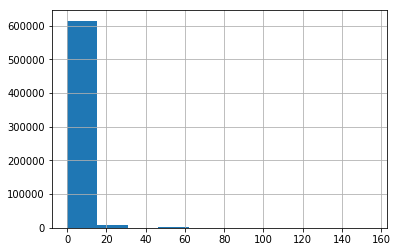

In [19]:
#Checking Distribution on total_worker
dataset.total_workers.hist()
print(dataset.total_workers.describe())
#the distrubition is skewed and consist of only one value hence we'll not consider this column

count    6.246500e+05
mean     8.285702e+04
std      4.266316e+04
min      0.000000e+00
25%      6.300000e+04
50%      7.600000e+04
75%      1.000000e+05
max      1.688000e+06
Name: wage_rate_of_pay_from, dtype: float64


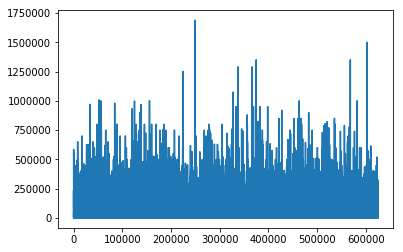

In [20]:
#Checking Distribution on wage rate of pay from
dataset.wage_rate_of_pay_from.plot()
print(dataset.wage_rate_of_pay_from.describe())
#There are variation in this column

count    6.246490e+05
mean     2.416596e+04
std      5.255090e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.000000e+06
Name: wage_rate_of_pay_to, dtype: float64


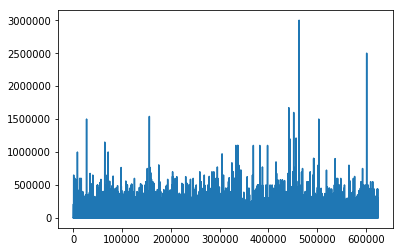

In [21]:
#Checking Distribution on wage_rate_of_pay_to
dataset.wage_rate_of_pay_to.plot()
print(dataset.wage_rate_of_pay_to.describe())
#the distrubition is skewed and consist of only one value hence we'll not consider this column

count    624650.000000
mean          0.834251
std           3.556236
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         150.000000
Name: new_employment, dtype: float64


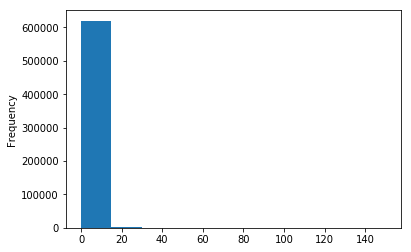

In [22]:

#Checking Distribution on new_employment
dataset.new_employment.plot(kind='hist')
print(dataset.new_employment.describe())
#the distrubition is skewed and consist of only one value hence we'll not consider this column

count    624650.000000
mean          0.326300
std           1.243793
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          55.000000
Name: continued_employment, dtype: float64


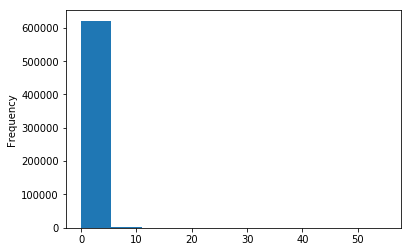

In [23]:
#Checking Distribution on continued_employment
dataset.continued_employment.plot(kind='hist')
print(dataset.continued_employment.describe())
#the distrubition is skewed and consist of only one value hence we'll not consider this column

count    624650.000000
mean          0.130657
std           0.955791
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          50.000000
Name: change_previous_employment, dtype: float64


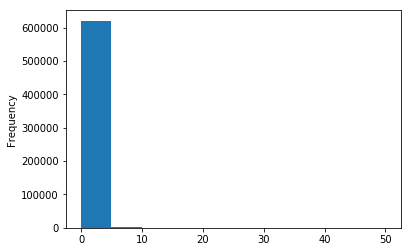

In [24]:
#Checking Distribution on change_previous_employment
dataset.change_previous_employment.plot(kind='hist')
print(dataset.change_previous_employment.describe())
#the distrubition is skewed and consist of only one value hence we'll not consider this column

### Categorical Variables.
-----

In [25]:
### Categorical variables
cat_vars = dataset.select_dtypes(include=['object']).columns
print(cat_vars)
print('Number of categorical variables: ', len(cat_vars))

Index(['visa_class', 'case_status', 'employer_city', 'employer_state',
       'employer_country', 'soc_name', 'soc_code', 'job_title',
       'employment_start_date', 'employment_end_date', 'full_time_position',
       'pw_unit_of_pay', 'wage_unit_of_pay', 'worksite_city',
       'worksite_county', 'pw_wage_level', 'pw_source', 'pw_source_other'],
      dtype='object')
Number of categorical variables:  18


count     624650
unique         4
top         H-1B
freq      610304
Name: visa_class, dtype: object


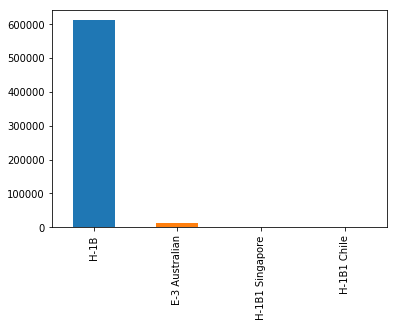

In [26]:
#checking for visa_class
dataset.visa_class.value_counts().plot(kind='bar')
print(dataset.visa_class.describe())

#Majority of class belong to H1-B hence we'll remove this

count        624650
unique            4
top       CERTIFIED
freq         545694
Name: case_status, dtype: object


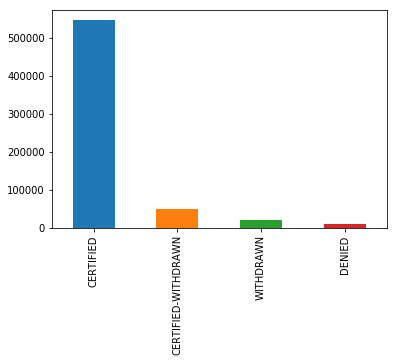

In [27]:
#checking for case_status
dataset.case_status.value_counts().plot(kind='bar')
print(dataset.case_status.describe())
#Majority of class belong to Certified but there are other variation hence we'll keep it for now

count     624632
unique        57
top           CA
freq      105701
Name: employer_state, dtype: object


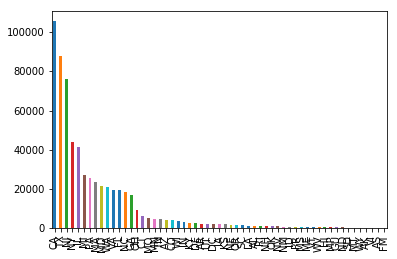

In [28]:
#checking for employer_state
dataset.employer_state.value_counts().plot(kind='bar')
print(dataset.employer_state.describe())
#There are many unique values out here

count                       528143
unique                           5
top       UNITED STATES OF AMERICA
freq                        528132
Name: employer_country, dtype: object


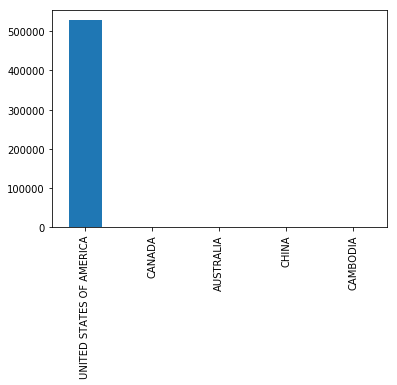

In [29]:
#checking for employer_country
dataset.employer_country.value_counts().plot(kind='bar')
print(dataset.employer_country.describe())
#Majority are united states hence we can't keep this in our model

In [30]:
#Checking for soc_code
print(dataset.soc_code.describe())
#There are many unique value which requires grouping

count      624648
unique        736
top       15-1132
freq       124841
Name: soc_code, dtype: object


count                 624645
unique                 93012
top       PROGRAMMER ANALYST
freq                   47151
Name: job_title, dtype: object


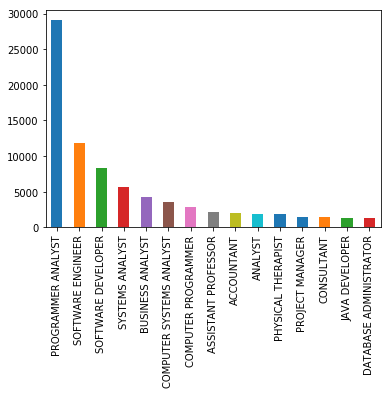

In [31]:
#Checking for job title full_time_position
print(dataset.job_title.describe())
dataset[dataset["pw_wage_level"]=='Level I']["job_title"].value_counts()[0:15].plot(kind='bar')
#There are many unique value which requires grouping
#Checking by job title doesn't give any information about the wage level,so going by wage rate , so checking with wage_rate_of_pay_from

In [32]:
def WRPF(level):
    lst=dataset.wage_rate_of_pay_from[dataset["pw_wage_level"]=='Level I'].value_counts()
    X=pd.Series(lst.index[0:10]).apply(lambda x: str(x))
    Y=lst[lst.index[0:10]]
    plt.bar(X,Y)
    plt.show()

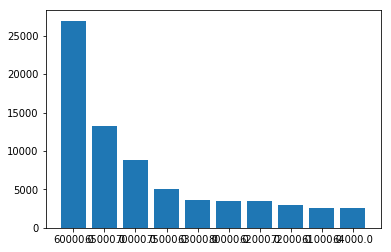

In [33]:
WRPF('Level I')

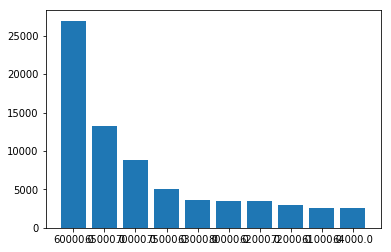

In [34]:
WRPF('Level II')

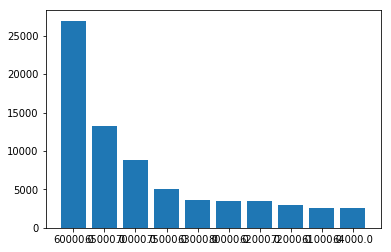

In [35]:
WRPF('Level III')

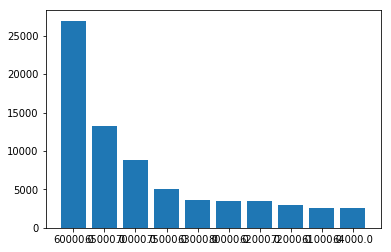

In [36]:
WRPF('Level IV')

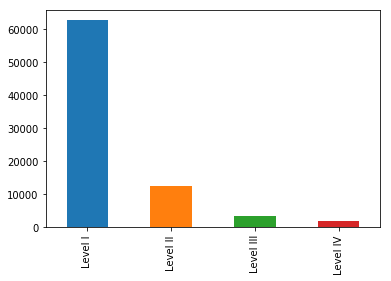

In [37]:
#we need to check the distribution of the levels in below 60 and 60-80 bucket
dataset[dataset['wage_rate_of_pay_from']<60000]["pw_wage_level"].value_counts().plot(kind='bar')

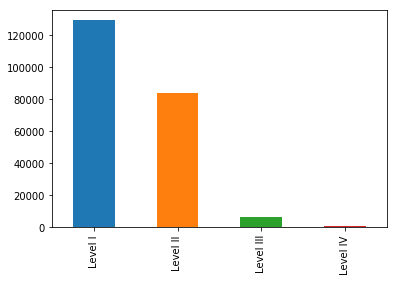

In [38]:
dataset[dataset['wage_rate_of_pay_from'].between(60000,80000)]["pw_wage_level"].value_counts().plot(kind='bar')
#hence buketing down , wage_rate_of_pay_from <=80000 -> level I ,80000-100000 --> level II, 100000-120000 -->level III and above 120000 level IV**

count     624604
unique         5
top         Year
freq      585301
Name: pw_unit_of_pay, dtype: object


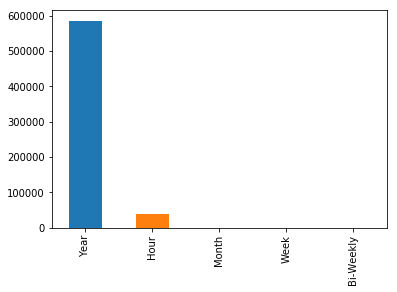

In [39]:
#Checking for pw_unit_of_pay
print(dataset.pw_unit_of_pay.describe())
dataset.pw_unit_of_pay.value_counts().plot(kind='bar')
#Majority of the row contain year hence well hour,month etc.. rows since they do dont contribute much

In [40]:
#Checking for worksite_city
print(dataset.worksite_city.describe())
#Majority of contribution are skewed hence we'll not consider this feature

count       624637
unique        7963
top       NEW YORK
freq         37722
Name: worksite_city, dtype: object


In [41]:
#Checking for worksite_county
print(dataset.worksite_county.describe())
#Majority of contribution are skewed hence we'll not consider this feature

count          623471
unique           3691
top       SANTA CLARA
freq            41862
Name: worksite_county, dtype: object


count      500930
unique          4
top       Level I
freq       221848
Name: pw_wage_level, dtype: object


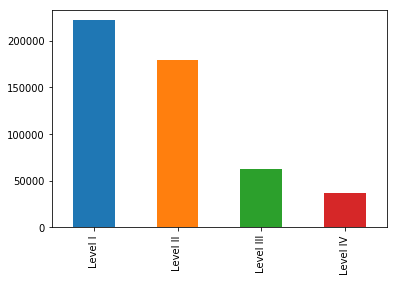

In [42]:
#Checking for pw_wage_level
print(dataset.pw_wage_level.describe())
dataset.pw_wage_level.value_counts().plot(kind='bar')

count     624604
unique         5
top          OES
freq      504806
Name: pw_source, dtype: object


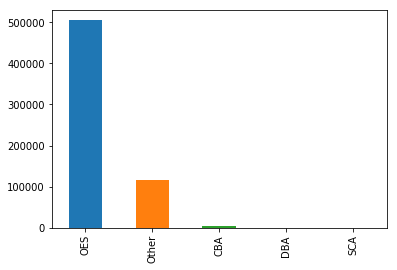

In [43]:
#Checking for pw_source
print(dataset.pw_source.describe())
dataset.pw_source.value_counts().plot(kind='bar')

In [44]:
# checking for pw_source_other
print(dataset.pw_source_other.describe())
#There are many unique values hence it need to be grouped

count                      618278
unique                       3083
top       OFLC ONLINE DATA CENTER
freq                       580142
Name: pw_source_other, dtype: object


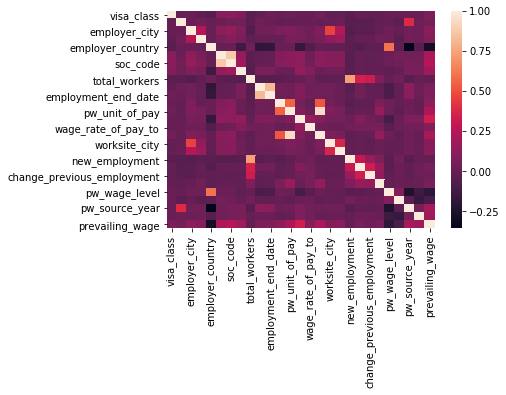

In [54]:
#Correlation
import matplotlib.pyplot as plt
cor = dataset.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
sns.heatmap(cor)
plt.savefig("output.png")
#fig = sns.get_figure()
#fig.savefig("output.png")


### Handling missing values, ouliers and selecting features.
---------

In [5]:
# pw_wage_level depends on job_title and wage_rate_of_pay,so cannot impute mode
# need to check the distribution of the levels in below 60 and 60-80 bucket
# As the value of unit of pay doesn't depends on any other column imputing with mode.

dataset['wage_unit_of_pay'].fillna(dataset['wage_unit_of_pay'].mode(),inplace=True)
dataset['pw_unit_of_pay'].fillna(dataset['pw_unit_of_pay'].mode(),inplace=True)

#pw_source is independent field and values not coverd in pw_source are covered in pw_source_other , so no relation
#There are 46 missing in 'pw_source' and 6372 in 'pw_source_other'(0.01%),hence imputiing with mode
dataset['pw_source'].fillna(dataset['pw_source'].mode(),inplace=True)
dataset['pw_source_other'].fillna(dataset['pw_source_other'].mode(),inplace=True)

# employment_start_date & employment_end_date has some null values which can be dropped
dataset.dropna(subset=['employment_start_date'], inplace=True)
dataset.dropna(subset=['employment_end_date'], inplace=True)
dataset.dropna(subset=['employer_state'], inplace=True)
dataset.dropna(subset=['job_title'], inplace=True)
dataset.dropna(subset=['full_time_position'], inplace=True)
dataset.dropna(subset=['wage_rate_of_pay_to'], inplace=True)
dataset.dropna(subset=['wage_unit_of_pay'], inplace=True)
dataset.dropna(subset=['pw_source'], inplace=True)
dataset.dropna(subset=['pw_source_other'], inplace=True)
dataset.dropna(subset=['prevailing_wage'], inplace=True)
dataset.dropna(subset=['worksite_county'], inplace=True)

NameError: name 'dataset' is not defined

In [59]:
# checking levels of categorical variables
dataset = dataset[dataset['soc_code'].notnull()]
#Replacing names which serve under code section
dataset['soc_code'].replace('SOFTWARE DEVELOPERS, APPLICATIONS','15-1132',inplace = True)
dataset['soc_code'].replace('COMPUTER SYSTEMS ANALYST','15-1121',inplace = True)
dataset['soc_code'].replace('ELECTRICAL ENGINEERS','17-2071',inplace = True)
dataset['soc_code'].replace('MECHANICAL ENGINEERS','17-2141',inplace = True)
dataset['soc_code'].replace('ENGINEERS, ALL OTHER','17-2199',inplace = True)
dataset['soc_code'].replace('COMPUTER OCCUPATIONS, ALL OTHER','15-1199',inplace = True)
dataset['soc_code'].replace('ACCONTANTS AND AUDITORS','13-2011',inplace = True)
dataset['soc_code'].replace('DATABASE ADMINISTRATORS','15-1141',inplace = True)
#Removing missing data
dataset = dataset.drop(dataset[dataset.soc_code == ''].index)

In [484]:
#Full time position
dataset = dataset.drop(dataset[dataset.full_time_position == ''].index)

##dropping some soc_codes as they are not needed
dataset = dataset.drop(dataset[dataset.soc_code == '2019'].index)
dataset = dataset.drop(dataset[dataset.soc_code == '1999'].index)
dataset = dataset.drop(dataset[dataset.soc_code == '1981'].index)
dataset = dataset.drop(dataset[dataset.soc_code == '1971'].index)
dataset = dataset.drop(dataset[dataset.soc_code == '1961'].index)
dataset = dataset.drop(dataset[dataset.soc_code == '1951'].index)
dataset = dataset.drop(dataset[dataset.soc_code == '1941'].index)
dataset = dataset.drop(dataset[dataset.soc_code == '1939'].index)
dataset = dataset.drop(dataset[dataset.soc_code == '1933'].index)
dataset = dataset.drop(dataset[dataset.soc_code == '1932'].index)
dataset = dataset.drop(dataset[dataset.soc_code == '1931'].index)


#Checking and imputing missing values
dataset = dataset.drop(dataset[dataset.employer_state == 'FM'].index)
dataset = dataset.drop(dataset[dataset.employer_state == 'AS'].index)
dataset = dataset.drop(dataset[dataset.job_title == '124592'].index)
dataset = dataset.drop(dataset[dataset.job_title == '62379'].index)
dataset['worksite_county'].dropna(axis = 0,inplace = True)

In [57]:
dataset = dataset[['case_status', 'employer_state', 'soc_code', 'job_title', 
                   'full_time_position', 'wage_rate_of_pay_from',
                   'wage_rate_of_pay_to', 'wage_unit_of_pay', 'pw_wage_level',
                   'pw_source', 'pw_source_other','prevailing_wage']]

In [58]:
#pw source other
print(dataset['pw_source'].value_counts())
dataset['pw_source'].replace('CBA','Other',inplace = True)
dataset['pw_source'].replace('DBA','Other',inplace = True)
dataset['pw_source'].replace('SCA','Other',inplace = True)

#Worksite county
dataset.loc[((dataset["wage_rate_of_pay_from"] < 80000) & (dataset["pw_wage_level"].isnull())),"pw_wage_level"] = "Level I"
dataset.loc[((dataset["wage_rate_of_pay_from"] >= 80000) & (dataset["wage_rate_of_pay_from"] < 100000) & (dataset["pw_wage_level"].isnull())),"pw_wage_level"] = "Level II"
dataset.loc[((dataset["wage_rate_of_pay_from"] >= 100000) & (dataset["wage_rate_of_pay_from"] < 120000) & (dataset["pw_wage_level"].isnull())),"pw_wage_level"] = "Level III"
dataset.loc[((dataset["wage_rate_of_pay_from"] >= 120000) & (dataset["pw_wage_level"].isnull())),"pw_wage_level"] = "Level IV"

### pw_source_other
dataset['pw_source_other'].replace('OFLC (ONLINE DATA CENTER)','OFLC ONLINE DATA CENTER',inplace = True)
dataset['pw_source_other'].replace('OFLC DATA CENTER','OFLC ONLINE DATA CENTER',inplace = True)

OES      504806
Other    115702
CBA        4053
DBA          22
SCA          21
Name: pw_source, dtype: int64


## Handling Ouliers.
-----

In [487]:
def Outlier_handling(dataset,column,count,replace_with):
    List_count=collections.Counter(dataset[column])
    List_Collect=list()
    List_Collect=[key for key,value in List_count.items() if value < count]        
    dataset[column].replace(List_Collect,replace_with,inplace=True)

In [488]:
Outlier_handling(dataset,'employer_state',9147,'Other')
print(dataset['employer_state'].value_counts())

CA       104560
TX        86940
NJ        75761
Other     65530
NY        43390
IL        40874
MI        26990
PA        25432
MA        23134
MD        21289
WA        20582
VA        19279
FL        18968
NC        18463
GA        16704
OH         9154
Name: employer_state, dtype: int64


In [489]:
Outlier_handling(dataset,'pw_source_other',10085,'Other')
print(dataset['pw_source_other'].value_counts())

OFLC ONLINE DATA CENTER             580611
Other                                25361
RADFORD GLOBAL TECHNOLOGY SURVEY     11078
Name: pw_source_other, dtype: int64


In [490]:
Outlier_handling(dataset,'soc_code',2000,'Other')
print(dataset['soc_code'].value_counts())

15-1132    124581
15-1121    110111
Other       87876
15-1131     66899
15-1199     58063
15-1133     18369
13-1111     13347
13-2011     11750
15-1142     11101
17-2141      9856
13-2051      9579
15-2031      9526
15-1141      7750
13-1161      7711
11-3021      6811
17-2072      6431
17-2071      6222
29-1069      5559
15-2041      5126
15-1134      5016
19-1042      4297
17-2199      3480
17-2112      3478
19-1029      3385
17-2051      3370
29-1123      2894
11-2021      2834
19-1021      2517
41-9031      2393
13-2099      2304
27-1024      2219
19-2031      2195
Name: soc_code, dtype: int64


In [491]:
dataset = dataset.drop(dataset[dataset.soc_code == 'Nov-21'].index)
dataset = dataset.drop(dataset[dataset.soc_code == 'Nov-31'].index)
dataset['wage_unit_of_pay'].replace('Bi-Weekly','Week',inplace = True)
print(dataset['wage_unit_of_pay'].value_counts())

Year     578715
Hour      37640
Month       430
Week        265
Name: wage_unit_of_pay, dtype: int64


In [493]:
#pw source other
print(dataset['pw_source'].value_counts())
dataset['pw_source'].replace('CBA','Other',inplace = True)
dataset['pw_source'].replace('DBA','Other',inplace = True)
dataset['pw_source'].replace('SCA','Other',inplace = True)

#Worksite county
dataset.loc[((dataset["wage_rate_of_pay_from"] < 80000) & (dataset["pw_wage_level"].isnull())),"pw_wage_level"] = "Level I"
dataset.loc[((dataset["wage_rate_of_pay_from"] >= 80000) & (dataset["wage_rate_of_pay_from"] < 100000) & (dataset["pw_wage_level"].isnull())),"pw_wage_level"] = "Level II"
dataset.loc[((dataset["wage_rate_of_pay_from"] >= 100000) & (dataset["wage_rate_of_pay_from"] < 120000) & (dataset["pw_wage_level"].isnull())),"pw_wage_level"] = "Level III"
dataset.loc[((dataset["wage_rate_of_pay_from"] >= 120000) & (dataset["pw_wage_level"].isnull())),"pw_wage_level"] = "Level IV"

### pw_source_other
dataset['pw_source_other'].replace('OFLC (ONLINE DATA CENTER)','OFLC ONLINE DATA CENTER',inplace = True)
dataset['pw_source_other'].replace('OFLC DATA CENTER','OFLC ONLINE DATA CENTER',inplace = True)

#taking backup

df = dataset.copy()

dataset = dataset[dataset.wage_rate_of_pay_from!=0] #removing 0 value
#dataset.wage_rate_of_pay_to[dataset.wage_rate_of_pay_to==0] = 0.4 * dataset.wage_rate_of_pay_from[dataset.wage_rate_of_pay_to==0] 
dataset = dataset[dataset.prevailing_wage > 5000]
dataset = dataset[dataset.wage_unit_of_pay =='Year']
dataset = dataset[dataset.prevailing_wage<400000] #Removing outliers

OES      470317
Other    108012
Name: pw_source, dtype: int64


**After the several iteration over selecting features, checking co-relation and going back and forth while cleaning the data, we came about selecting few features which can good for our model**

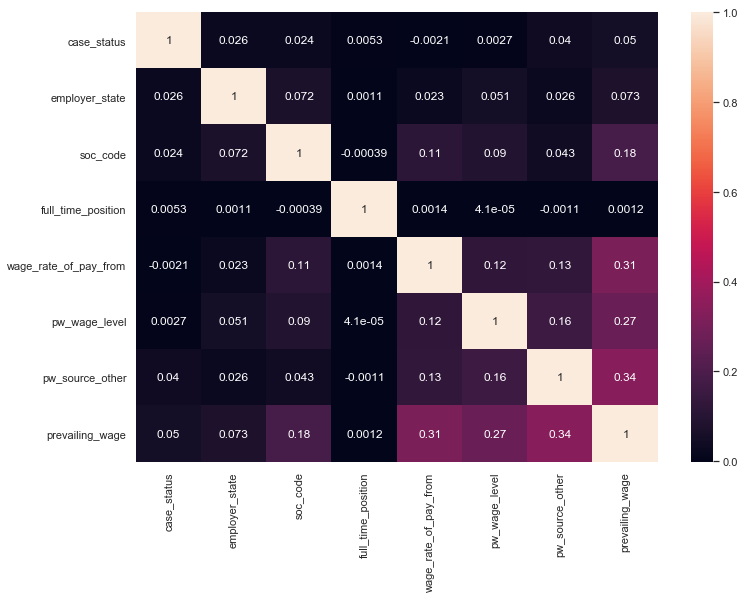

In [494]:
dataset = dataset[['case_status', 'employer_state', 'soc_code',
       'full_time_position', 'wage_rate_of_pay_from',
       'pw_wage_level','pw_source_other', 'prevailing_wage']]


cor = dataset.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
sns.heatmap(cor,annot=True)


### Model Building.
------

In [495]:
#Getting dummies from categorical variables
dataset = pd.get_dummies(dataset,columns=['case_status','employer_state',
                                'soc_code','full_time_position',
                                'pw_wage_level','pw_source_other'],drop_first=True)

dataset = dataset.reset_index(drop=True)    

In [496]:
X = dataset.loc[:, dataset.columns != 'prevailing_wage']
y = dataset['prevailing_wage']
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

In [497]:
#Linear regression
lm = LinearRegression(normalize=True)
lm.fit(X_train,y_train)
print('R-Sqaure Score:',lm.score(X_test,y_test))

R-Sqaure Score: 0.7758457468707041


In [498]:
#Predicting values
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

#Checking scores
print("Train MAE:",np.round(mean_absolute_error(y_train, y_train_pred)))
print('Train RMSE: {}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print("Train MAPE:",np.round(np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100),"%")
print()
print("Test MAE:", np.round(mean_absolute_error(y_test, y_test_pred)))
print('Test RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print("Test MAPE:",np.round(np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100),"%")
print()
print('Average prevailing wage: ', y_train.median())

Train MAE: 8145.0
Train RMSE: 12832.2723738842
Train MAPE: 11.0 %

Test MAE: 8181.0
Test RMSE: 12876.975614634142
Test MAPE: 11.0 %

Average prevailing wage:  72301.0


### Regularised linear regression
-----

In [499]:
# train the model
lin_model = Lasso(alpha=0.005, random_state=45) # remember to set the random_state / seed
lin_model.fit(X_train, y_train)
print('R-Sqaure Score:',lin_model.score(X_test,y_test))

R-Sqaure Score: 0.775846140066879


In [500]:
pred = lin_model.predict(X_train)

print("Train MAE:",np.round(mean_absolute_error(y_train, pred)))
print('Train RMSE: {}'.format(np.sqrt(mean_squared_error(y_train, pred))))
print("Train MAPE:",np.round(np.mean(np.abs((y_train - pred) / y_train)) * 100),"%")

pred = lin_model.predict(X_test)
print()
print("Test MAE:",np.round(mean_absolute_error(y_test, pred)))
print('Test RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, pred))))
print("Test MAPE:",np.round(np.mean(np.abs((y_test - pred) / y_test)) * 100),"%")
print()
print('Average prevailing wage: ', y_train.median())

Train MAE: 8145.0
Train RMSE: 12832.291751208733
Train MAPE: 11.0 %

Test MAE: 8181.0
Test RMSE: 12876.964320670932
Test MAPE: 11.0 %

Average prevailing wage:  72301.0
